In [2]:
# -*-coding: utf-8-*-
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
import seaborn as sns
from collections import defaultdict, Counter
%matplotlib inline

# 데이터 탐색

In [3]:
train = pd.read_json('train.json')
train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


* 분류해야 할 Class 갯수

In [4]:
len(set(list(train['cuisine'])))

20

* 분류해야 할 Class List

In [5]:
set(list(train['cuisine']))

{u'brazilian',
 u'british',
 u'cajun_creole',
 u'chinese',
 u'filipino',
 u'french',
 u'greek',
 u'indian',
 u'irish',
 u'italian',
 u'jamaican',
 u'japanese',
 u'korean',
 u'mexican',
 u'moroccan',
 u'russian',
 u'southern_us',
 u'spanish',
 u'thai',
 u'vietnamese'}

* 재료 하나하나 분리해서 분석해보기

In [6]:
rows = []
_ = train.apply(lambda row: [rows.append([row['cuisine'], row['id'], ingredient])
                                for ingredient in row.ingredients], axis = 1)
train_repair = pd.DataFrame(rows, columns = train.columns).set_index(['cuisine', 'id'])

#  재료 사용빈도 알아보기 

In [7]:
train_repair[:9]

ingredients
cuisine id                         
greek   10259       romaine lettuce
        10259          black olives
        10259        grape tomatoes
        10259                garlic
        10259                pepper
        10259          purple onion
        10259             seasoning
        10259        garbanzo beans
        10259  feta cheese crumbles

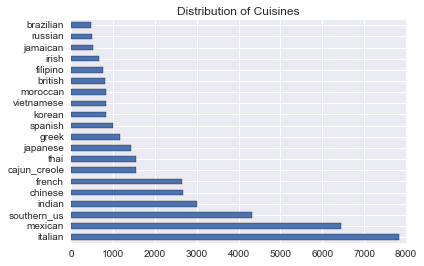

In [8]:
train['cuisine'].value_counts().plot(kind='barh')
plt.title('Distribution of Cuisines')
plt.show()

* Defaultdict를 이용하여 재료 사용 빈도 파악

In [9]:
ingredients_list = defaultdict(int)

for w in train_repair['ingredients']:
    ingredients_list[w] += 1
print ingredients_list

defaultdict(<type 'int'>, {u'low-sodium fat-free chicken broth': 22, u'sweetened coconut': 3, u'baking chocolate': 3, u'egg roll wrappers': 57, u'bottled low sodium salsa': 1, u'vegan parmesan cheese': 4, u'clam sauce': 1, u'mahlab': 1, u'(10 oz.) frozen chopped spinach, thawed and squeezed dry': 2, u'figs': 33, u'caramels': 10, u'broiler': 2, u'jalapeno chilies': 1730, u'(15 oz.) refried beans': 3, u'brioche buns': 3, u'broccoli romanesco': 1, u'flaked oats': 1, u'anise extract': 14, u'whole wheat pastry flour': 30, u'ravva': 11, u'bacon': 620, u'millet': 5, u'country crock honey spread': 1, u'matcha green tea powder': 11, u'chopped fresh thyme': 375, u'chicken gravy mix': 2, u'walnut oil': 14, u'Kraft Slim Cut Mozzarella Cheese Slices': 1, u'fresh angel hair': 5, u'salsify': 2, u'galangal': 85, u'chicken schmaltz': 3, u'butter crackers': 3, u'jasmine': 6, u'Bisquick Baking Mix': 8, u'canned jalapeno peppers': 2, u'short-grain rice': 62, u'ground cayenne pepper': 139, u'orange soda': 

In [10]:
sorted_ingredients_list = sorted(ingredients_list.items(), key=lambda x : x[1], 
                                 reverse = True )
print sorted_ingredients_list

[(u'salt', 18049), (u'olive oil', 7972), (u'onions', 7972), (u'water', 7457), (u'garlic', 7380), (u'sugar', 6434), (u'garlic cloves', 6237), (u'butter', 4848), (u'ground black pepper', 4785), (u'all-purpose flour', 4632), (u'pepper', 4438), (u'vegetable oil', 4385), (u'eggs', 3388), (u'soy sauce', 3296), (u'kosher salt', 3113), (u'green onions', 3078), (u'tomatoes', 3058), (u'large eggs', 2948), (u'carrots', 2814), (u'unsalted butter', 2782), (u'extra-virgin olive oil', 2747), (u'ground cumin', 2747), (u'black pepper', 2627), (u'milk', 2263), (u'chili powder', 2036), (u'oil', 1970), (u'red bell pepper', 1939), (u'purple onion', 1896), (u'scallions', 1891), (u'grated parmesan cheese', 1886), (u'sesame oil', 1773), (u'corn starch', 1757), (u'ginger', 1755), (u'baking powder', 1738), (u'jalapeno chilies', 1730), (u'dried oregano', 1707), (u'chopped cilantro fresh', 1698), (u'fresh lemon juice', 1679), (u'diced tomatoes', 1624), (u'fresh parsley', 1604), (u'minced garlic', 1583), (u'chicke

# 재료 사용빈도 시각화

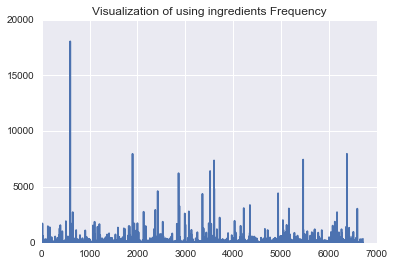

In [11]:
plt.plot(ingredients_list.values())
plt.title('Visualization of using ingredients Frequency')

* 재료 사용빈도 Top 10 알아보기

In [12]:
sorted_ingredients_list[:10]

[(u'salt', 18049),
 (u'olive oil', 7972),
 (u'onions', 7972),
 (u'water', 7457),
 (u'garlic', 7380),
 (u'sugar', 6434),
 (u'garlic cloves', 6237),
 (u'butter', 4848),
 (u'ground black pepper', 4785),
 (u'all-purpose flour', 4632)]

* 나라별로 어떤 종류의 식자재를 자주 사용하는가?

In [13]:
how_many_using_ingredients = {}
for cuisine in train['cuisine'].unique():
    how_many_using_ingredients[cuisine] = Counter()
    u_cuisine = (train['cuisine'] == cuisine)
    
    for ingredients in train[u_cuisine]['ingredients']:
        how_many_using_ingredients[cuisine].update(ingredients)

In [14]:
# 아일랜드 사람들이 주로 사용하는 재료 10가지
how_many_using_ingredients['irish'].most_common(10)

[(u'salt', 376),
 (u'butter', 219),
 (u'all-purpose flour', 219),
 (u'onions', 132),
 (u'potatoes', 120),
 (u'sugar', 120),
 (u'baking soda', 115),
 (u'baking powder', 112),
 (u'milk', 111),
 (u'carrots', 105)]

* 나라별 재료 사용 빈도 Top 10 Pandas DataFrame으로 출력

In [15]:
using_top_10_ingredients_of_country = pd.DataFrame([[ingredients[0] for ingredients in
                                                    how_many_using_ingredients[cuisine].most_common(10)]
                                                   for cuisine in how_many_using_ingredients],
                                                  index = [cuisine for cuisine in how_many_using_ingredients],
                                                  columns = ['Top {}'.format(i) for i in range(1, 11)])




In [16]:
using_top_10_ingredients_of_country

,Top 1,Top 2,Top 3,Top 4,Top 5,Top 6,Top 7,Top 8,Top 9,Top 10
irish,salt,butter,all-purpose flour,onions,potatoes,sugar,baking soda,baking powder,milk,carrots
mexican,salt,onions,ground cumin,garlic,olive oil,chili powder,jalapeno chilies,sour cream,avocado,corn tortillas
chinese,soy sauce,sesame oil,salt,corn starch,sugar,garlic,water,green onions,vegetable oil,scallions
filipino,salt,garlic,water,onions,soy sauce,pepper,oil,sugar,carrots,ground black pepper
vietnamese,fish sauce,sugar,salt,garlic,water,carrots,soy sauce,shallots,garlic cloves,vegetable oil
moroccan,salt,olive oil,ground cumin,onions,ground cinnamon,garlic cloves,water,ground ginger,carrots,paprika
brazilian,salt,onions,olive oil,lime,water,garlic cloves,garlic,cachaca,sugar,tomatoes
japanese,soy sauce,salt,mirin,sugar,water,sake,rice vinegar,vegetable oil,scallions,ginger
british,salt,all-purpose flour,butter,milk,unsalted butter,eggs,sugar,onions,baking powder,large eggs
greek,salt,olive oil,dried oregano,garlic cloves,feta cheese crumbles,extra-virgin olive oil,fresh lemon juice,ground black pepper,garlic,pepper


* 나라별 재료 사용 빈도 시각화

In [18]:
# 나라별 재료 빈도 top 10 정리
top10Brazil = how_many_using_ingredients['brazilian'].most_common(10)
top10Britain = how_many_using_ingredients['british'].most_common(10)
top10cajun= how_many_using_ingredients['cajun_creole'].most_common(10)
top10China= how_many_using_ingredients['chinese'].most_common(10)
top10Philippine= how_many_using_ingredients['filipino'].most_common(10)
top10France= how_many_using_ingredients['french'].most_common(10)
top10Greece= how_many_using_ingredients['greek'].most_common(10)
top10India= how_many_using_ingredients['indian'].most_common(10)
top10Ireland= how_many_using_ingredients['irish'].most_common(10)
top10Italy= how_many_using_ingredients['italian'].most_common(10)
top10Jamaica= how_many_using_ingredients['jamaican'].most_common(10)
top10Japan= how_many_using_ingredients['japanese'].most_common(10)
top10Korea= how_many_using_ingredients['korean'].most_common(10)
top10Mexico= how_many_using_ingredients['mexican'].most_common(10)
top10Morocco= how_many_using_ingredients['moroccan'].most_common(10)
top10Russia= how_many_using_ingredients['russian'].most_common(10)
top10S_US= how_many_using_ingredients['southern_us'].most_common(10)
top10Spain= how_many_using_ingredients['spanish'].most_common(10)
top10Thailand= how_many_using_ingredients['thai'].most_common(10)
top10Vietnam= how_many_using_ingredients['vietnamese'].most_common(10)

In [19]:
totalcountry = [top10Brazil, top10Britain, top10cajun, top10China, top10France, top10Greece,
               top10India, top10Ireland, top10Italy, top10Jamaica, top10Japan,
               top10Korea, top10Mexico, top10Morocco, top10Philippine, top10Russia, top10S_US,
               top10Spain, top10Thailand, top10Vietnam]

country = ['brazilian', 'british', 'cajun_creole', 'chinese', 'french', 'greek',
 'indian', 'irish', 'italian', 'jamaican', 'japanese', 'korean', 'mexican', 'moroccan', 
 'filipino','russian', 'southern_us', 'spanish','thai', 'vietnamese']

plt.figure(figsize= (150,170))
mpl.rcParams['xtick.labelsize'] = 60
mpl.rcParams['ytick.labelsize'] = 60
for num,(totalcountry_top10, name) in enumerate(zip(totalcountry, country)):
    plt.subplot(10,2, num + 1)
    sns.barplot(x = map(lambda x : x[0], totalcountry_top10), y = map(lambda x : x[1], totalcountry_top10))
    plt.tight_layout()
    plt.title('{} of Top 10 Ingredients'.format(name),{'fontsize':80})

### Top 10으로 나온 재료들 중 모르는 재료들 찾아보기 
 
* soy sauce = 간장
* all purpose flour = 중력분
* garlic cloves = 마늘 한쪽
* sesame oil = 참기름
* ground black pepper = 후추가루
* ground turmeric = 강황가루
* rice vinegar = 현미식초
* ground allspice = 올스파이스 분말
* sake = 사케
* corn starch = 옥수수 녹말
* scallions = 골파 ( 유럽이 원산지인 파의 냄새가 나지 않고 향긋한 작은 파)
* red bell pepper = 붉은색 피망
* corn tortillas = 토르티야
* cayenne pepper = 카옌 후추
* shallots = 셜롯
* cachaca = 브라질에서 사탕수수를 정제해서 만든 민속주
* dried thyme = 건조된 타임(향신료 일종)
* garam masala = '매운 혼합물' 인도 음식에 사용되는 혼햡 향신료를 총칭하는 말.
* dried oregano = 건조된 오레가노(향신료)
* mirin = 소주에 찐 찹쌀과 누룩을 넣어, 이 속에서 쌀전분을 당화시킨 것